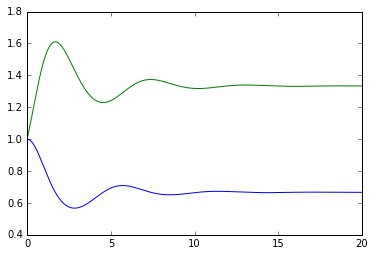

In [115]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
  
def BoatFishSystem(state, t, *args):
    '''http://www.danham.me/r/2015/10/29/differential-eq.html'''
    A = args[0]
    B = args[1]
    C = args[2]
    fish, boat = state
    d_fish = fish * (A - boat - fish)
    d_boat = -boat * (B - C * fish)
    return [d_fish, d_boat]

A = 2.0
B = 1.0
C = 1.5
params = (A, B, C)
n_steps = 100000
t = np.linspace(0, 20, n_steps)
init_state = [1, 1]
species = odeint(BoatFishSystem, init_state, t, args = (params))

plt.plot(t, species)
plt.show()

In [116]:
noise = np.random.normal(0, 1, species.shape)
species = species + noise

In [117]:
def residuals(p):
    p = tuple(p)
    sim_P = odeint(BoatFishSystem, init_state, t, args = p)
    res = sim_P - species
    return res.flatten()

In [118]:
from scipy.optimize import leastsq
initial_guess = [1, 1, 1]
fitted_params = leastsq(residuals, initial_guess)[0]

In [119]:
print(params)

(2.0, 1.0, 1.5)


In [120]:
print(fitted_params)

[ 2.00778306  1.00872718  1.50103753]
